In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Ensures output is step by step.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Simple Linear Regression

### Question 1

In [3]:
house= pd.read_csv("Housing.csv", index_col=0)
house.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


### Question 2

In [4]:
#a.Number of features in the data
#From output there are 12 columns
len(house.columns)

12

In [5]:
#b.Number of instances
#From output there are 546 rows of data
len(house.index)

546

In [6]:
#c.Data types of the features
house.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

In [7]:
#d.Features with missing values
#From the output there are no missing values
#alternative code/house.columns[house.isnull().any()].tolist()/
house.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

### Question 3

In [8]:
#Obtaining the first 70% of the data
needed = int(70/100 * len(house))
house2 = house.iloc[:needed]
house2.shape


(382, 12)

In [9]:
#a.
#Dependent Variable, y, is Price of the house.
#Independent Variable, x, is Lot size

Text(0.5, 1.0, 'Lot Size against Price of the house')

Text(0.5, 0, 'Lot Size')

Text(0, 0.5, 'Price of House')

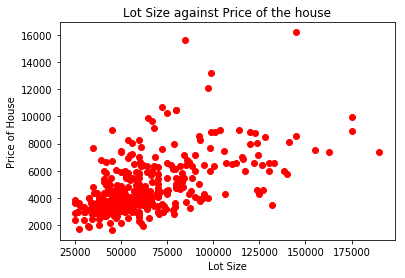

In [10]:
#b. Scatter Plot of Price vs Lotsize
HousePrice = house2['price'].values
LotSize = house2['lotsize'].values

#Defining axes
plt.scatter(HousePrice,LotSize, color = "red")
plt.title("Lot Size against Price of the house")
plt.xlabel('Lot Size')
plt.ylabel('Price of House')
plt.show()


In [11]:
#c. User-defined function that returns Regression Model
def regression_model(X,Y):
     # the linear regression equation is in the form of 
     # y = B0 + B1x
     # but B0 is given by mean(Y)-B1*mean(X)
     # and B1 is given by A/B where
     # A = sum of [(X-mean(X))*(Y-mean(Y))] and 
     # B = sum of [(X-mean(X))^2]
    #Therefore to calculate B1:
    A = 0
    B = 0
    for y,x in enumerate (X):
        A +=(x - X.mean()) *(Y[y]-Y.mean())
        B += ((x - X.mean())) ** 2
    #and therefore
        B1 = A / B
    
    #and calculating B0:
        B0 = Y.mean()- (B1*X.mean())
        
    #and therefore substituting and printing the equation
    print("y=",B1,"x +", B0)

In [12]:
#d. Linear regression model learned
regression_model(house2['lotsize'].values, house2['price'].values)

y= 7.551670065490921 x + 27930.188218578696


### Question 4

In [32]:
#a.
#Before splitting the data we should ensure that all the columns
#are in countinuous format and not discrete adn therefore
#for the columns driveway,recroom,fullbase,gashw,airco and prefarea
#should be converted to continuous values i.e 0=no and 1=yes.

house.replace(["yes","no"],[1, 0], inplace = True)
house.head(5)

#Splitting the data into 70% training and 30% test
from sklearn.model_selection import train_test_split
X = house['lotsize'].values
y = house['price'].values
X.shape
X = X.reshape(len(X), 1)
X.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


(546,)

(546, 1)

In [14]:
#b.
#train_test_split() method  allows us to split data into a training set and test set
#it takes the arguments testsize that picks the % that should be used for testing, 
#the dataset values in this case and an optional random state 

In [15]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
Y_predicted = linear_regression.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#c. Linear Regression model learned
print('y = ', linear_regression.coef_,'* x + ', linear_regression.intercept_)

y =  [6.46224318] * x +  33975.02575018678


Text(0.5, 1.0, 'Scatter Plot for the learnt model using the test and train data')

Text(0.5, 0, 'Tested Y values')

Text(0, 0.5, 'Predicted Y values')

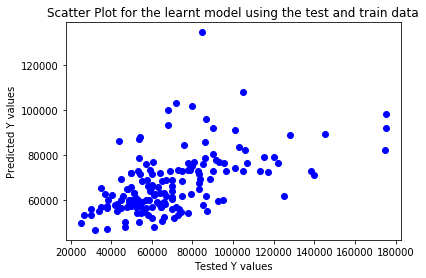

In [17]:
#d. Redrawing the scatter plot of the dependent variable vs independent variable
plt.scatter(Y_test, Y_predicted, color = "blue")
plt.title("Scatter Plot for the learnt model using the test and train data")
plt.xlabel('Tested Y values')
plt.ylabel('Predicted Y values')
plt.show()

Text(0.5, 1.0, 'Regression Model')

Text(0.5, 0, 'Testing X values')

Text(0, 0.5, 'Predicted Y values')

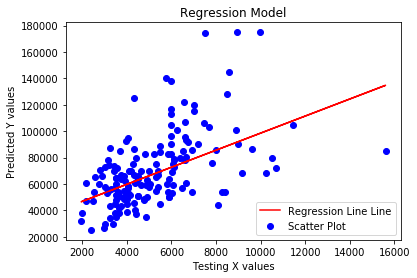

In [18]:
#e. Line for learned linear regression model
plt.scatter(X_test, Y_test, color = 'blue', label = 'Scatter Plot')
plt.plot(X_test, Y_predicted, color = 'red', label = 'Regression Line Line')

plt.title('Regression Model')
plt.xlabel('Testing X values')
plt.ylabel('Predicted Y values')
plt.legend()

plt.show()

In [19]:
#f.
MSE = np.mean((linear_regression.predict(X_test) - Y_test) ** 2)
print('MSE = ', MSE)

Lotsize= house2['lotsize']
Price = house2['price']

SSE = np.sum((Price - Price.mean()) ** 2)

print('SSE = ', SSE)

MSE =  536581776.3929133
SSE =  286394061949.2906


In [20]:
#g.
coefficient= linear_regression.score(X_train, Y_train)

print(coefficient)

0.2895103559990492


Text(0.5, 1.0, 'Residual Plot')

Text(0.5, 0, 'Predicted Ys')

Text(0, 0.5, 'Residual values')

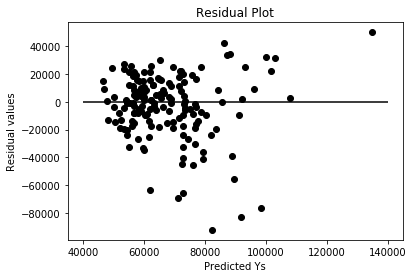

In [21]:
#h.The residual plot
plt.scatter(linear_regression.predict(X_test), linear_regression.predict(X_test) - Y_test, color ='black' )
plt.hlines(y = 0, xmin = 40000, xmax = 140000)

plt.title('Residual Plot')
plt.xlabel('Predicted Ys')
plt.ylabel('Residual values')


plt.show()

# Multiple Regression

### Question 1

In [22]:
#Import load_boston the dataset from sklearn.datasets
from sklearn.datasets import load_boston

#Call the method load_boston() and save it in a variable called boston
boston = load_boston()

### Question 3 

In [23]:
#The variable type
#Which is a Python dictionary as an object
type(boston)

sklearn.utils.Bunch

### Question 4

In [24]:
#The boston variable's data, feature_names, target and DESCR
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [25]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Question 5

In [26]:
#Create a dataframe from the data in boston
Bost = pd.DataFrame(boston.data, columns = boston.feature_names)
Bost.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
target = pd.DataFrame(boston.target, columns = ['MEDV'])
target.head(5)
Bost.head(5)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Question 7

In [28]:
#a.
#Training and test data sets
mlr_X_train, mlr_X_test, mlr_Y_train, mlr_Y_test = train_test_split(Bost, target.values, test_size=0.3)

In [29]:
#b.
#The multiple linear regression model
multi_linear = LinearRegression()
multi_linear.fit(mlr_X_train, mlr_Y_train)

Y_predictions = multi_linear.predict(mlr_X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
#c.
#The multiple linear regression model learned
print('y = ', multi_linear.coef_,'* x + ', multi_linear.intercept_)

y =  [[-1.08364932e-01  5.33666672e-02  7.27411833e-02  4.35367179e+00
  -1.43554233e+01  5.49556782e+00 -2.14186485e-02 -1.55045429e+00
   2.98713356e-01 -1.36593351e-02 -8.38450136e-01  1.00376747e-02
  -4.33846828e-01]] * x +  [22.21509555]


In [31]:
#d.
#Determining the SSE, MSE and coefficient of determination.
MSE = np.mean((multi_linear.predict(mlr_X_test) - mlr_Y_test) ** 2)
print('MSE = ', MSE)


SSE = np.sum((target.values - target.values.mean()) ** 2)
print('SSE = ', SSE)


coeff = multi_linear.score(mlr_X_train, mlr_Y_train)
print('Coefficient of determination = ', coeff)

MSE =  32.148392996292436
SSE =  42716.29541501977
Coefficient of determination =  0.7799574219771835
